In [ ]:
import math
import yfinance as yf
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
# pull stock quote

XOM_df = yf.download('XOM', '2002-09-21','2003-3-21')

# drop data

XOM_df = XOM_df.drop(labels=["High", "Low", "Close", "Adj Close", "Volume"], axis=1)

# show data

XOM_df

[*********************100%***********************]  1 of 1 completed


,Open
Date,
2002-09-23,32.619999
2002-09-24,32.500000
2002-09-25,32.880001
2002-09-26,33.349998
2002-09-27,33.900002
...,...
2003-03-14,34.549999
2003-03-17,34.450001
2003-03-18,34.980000


In [ ]:
# Get number of rows and columns in dataset

XOM_df.shape

(124, 1)

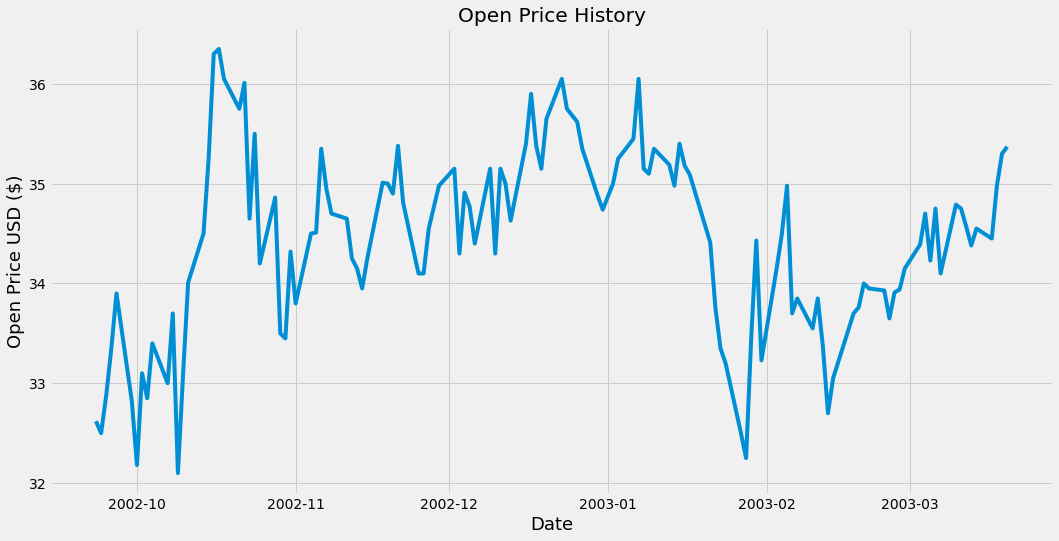

In [ ]:
# visualize closing price of stock

plt.figure(figsize = (16,8))
plt.title('Open Price History')
plt.plot(XOM_df['Open'])
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Open Price USD ($)', fontsize = 18)
plt.show()

In [ ]:
# new df with only close column
data = XOM_df.filter(['Open'])
# convert to numpy array
dataset = data.values
# build training data
training_data_len = math.ceil(len(dataset) * 0.8)

training_data_len


100

In [ ]:
# Scale data

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.12235305],
       [0.09411801],
       [0.18353002],
       [0.29411765],
       [0.42353013],
       [0.16941205],
       [0.01882396],
       [0.23529412],
       [0.17647059],
       [0.30588307],
       [0.21176506],
       [0.37647113],
       [0.        ],
       [0.23058903],
       [0.44941173],
       [0.56470624],
       [0.74117683],
       [0.98823547],
       [1.        ],
       [0.92941194],
       [0.85882389],
       [0.91999996],
       [0.60000072],
       [0.80000036],
       [0.49411819],
       [0.64941227],
       [0.32941212],
       [0.3176476 ],
       [0.52235323],
       [0.40000018],
       [0.56470624],
       [0.56705879],
       [0.76470588],
       [0.67058877],
       [0.61176524],
       [0.60000072],
       [0.50588271],
       [0.48235366],
       [0.43529466],
       [0.50588271],
       [0.68470585],
       [0.6823533 ],
       [0.65882425],
       [0.77176532],
       [0.63764774],
       [0.47058824],
       [0.47058824],
       [0.576

In [ ]:
# create training data
# scale the training data

train_data = scaled_data[0:training_data_len, :]
# split data into training and testing 

x_train = []
y_train = []

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i, 0])
  if i <= 61:
    print(x_train)
    print(y_train)
    print()

[array([0.12235305, 0.09411801, 0.18353002, 0.29411765, 0.42353013,
       0.16941205, 0.01882396, 0.23529412, 0.17647059, 0.30588307,
       0.21176506, 0.37647113, 0.        , 0.23058903, 0.44941173,
       0.56470624, 0.74117683, 0.98823547, 1.        , 0.92941194,
       0.85882389, 0.91999996, 0.60000072, 0.80000036, 0.49411819,
       0.64941227, 0.32941212, 0.3176476 , 0.52235323, 0.40000018,
       0.56470624, 0.56705879, 0.76470588, 0.67058877, 0.61176524,
       0.60000072, 0.50588271, 0.48235366, 0.43529466, 0.50588271,
       0.68470585, 0.6823533 , 0.65882425, 0.77176532, 0.63764774,
       0.47058824, 0.47058824, 0.57647077, 0.67764731, 0.71764778,
       0.51764724, 0.66117679, 0.62823576, 0.54117719, 0.71764778,
       0.51764724, 0.71764778, 0.6823533 , 0.59529473, 0.77647131])]
[0.8941183651194855]

[array([0.12235305, 0.09411801, 0.18353002, 0.29411765, 0.42353013,
       0.16941205, 0.01882396, 0.23529412, 0.17647059, 0.30588307,
       0.21176506, 0.37647113, 0.   

In [ ]:
# convert x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
# reshape data (NN Expects 3-D Data)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape


(40, 60, 1)

In [ ]:
# build Neural network
model = Sequential()
model.add(LSTM(50,  return_sequences = True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))


In [ ]:
# Compile Model

model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [ ]:
# train the model
model.fit(x_train, y_train, batch_size=1, epochs = 1)

40/40 [==============================] - 5s 28ms/step - loss: 0.0626


In [ ]:
# create the testing dataset
# create a new array containing scaled values from index 
test_data = scaled_data[training_data_len - 60:, :]
# create the datasets x_test, y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])
  


In [ ]:
# convert data to a numpy array

x_test = np.array(x_test)

In [ ]:
# reshape data for LSTM Expectations

x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [ ]:
# get the models predicted price values

predictions = model.predict(x_test)

# unscale values

predictions = scaler.inverse_transform(predictions)



1/1 [==============================] - 2s 2s/step


In [ ]:
# evaluate model with RMSE

rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

0.826937198638916

<ipython-input-24-0f58e1045969>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


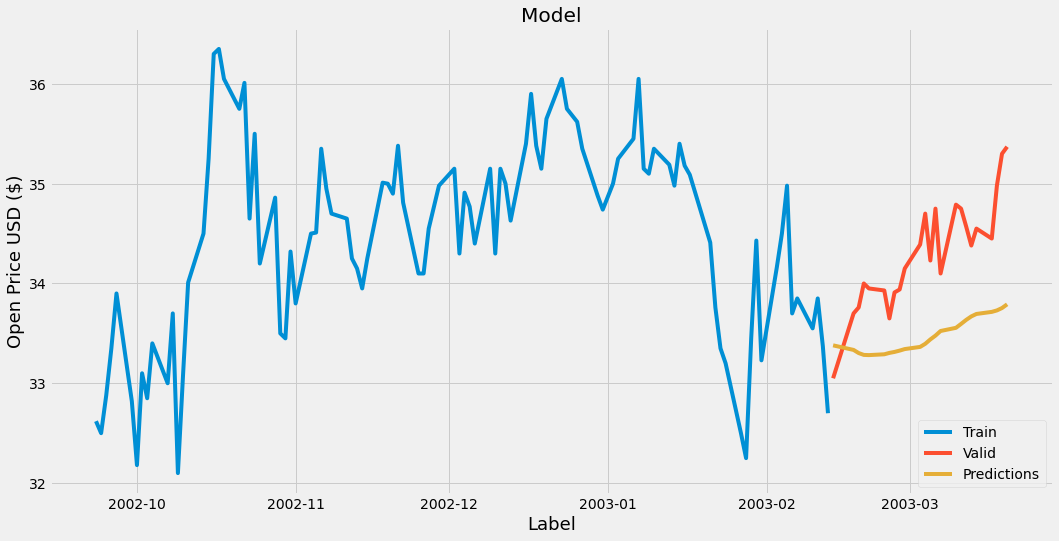

In [ ]:
# plot the data

train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

# visualize data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Label', fontsize = 18)
plt.ylabel('Open Price USD ($)', fontsize = 18)
plt.plot(train['Open'])
plt.plot(valid[['Open', 'Predictions']])
plt.legend(['Train', 'Valid', 'Predictions'], loc = 'lower right')

In [ ]:
# Show the validation and predicted price

valid

,Open,Predictions
Date,,
2003-02-14,33.049999,33.380058
2003-02-18,33.700001,33.334160
2003-02-19,33.759998,33.302704
2003-02-20,34.000000,33.284279
2003-02-21,33.950001,33.282284
2003-02-24,33.930000,33.290325
2003-02-25,33.650002,33.304298
2003-02-26,33.910000,33.314114
2003-02-27,33.939999,33.327339


In [ ]:
# Get the quote

stock_quote = web.DataReader('GNUS', data_source='yahoo', start = '2012-01-10', end = '2021-02-10')

# create a new df

new_df = stock_quote.filter(['Close'])

# get last 60 days and convert df to an array

last_60_days = new_df[-60:].values

# scale the data values between 0 and 1

last_60_days_scaled = scaler.transform(last_60_days)

# create empty list x_test

X_test = []

# append last 60 days of

X_test.append(last_60_days_scaled)

# convert the X_test dataset into np array

X_test = np.array(X_test)

# Reshape data

X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# get the predicted scaled price

pred_price = model.predict(X_test)

# undo scaling

pred_price = scaler.inverse_transform(pred_price)

print(pred_price)

[[1.5103608]]


In [ ]:
stock_quote2 = web.DataReader('GNUS', data_source='yahoo', start = '2021-02-10', end = '2021-02-10')
print(stock_quote2['Close'])

Date
2021-02-10    2.07
Name: Close, dtype: float64
